<a href="https://colab.research.google.com/github/Shadhin282/Butterfly-Image-Classification/blob/main/Butterfly_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
phucthaiv02_butterfly_image_classification_path = kagglehub.dataset_download('phucthaiv02/butterfly-image-classification')

print('Data source import complete.')


**Problem Statement:** Identify the butterfly species by using deep learning methods.

**Objectives :** There is available Butterfly images in test and train folder. by these data have to made a automated butter fly species identification process.

**Literature Review** : as i found that by using simple CNN get 50% accuracy and high loss so also found that using trained model can get 80% accuracy. for getting high accuracy and less loss hardware requirement should be considered.

**Dataset & Preprocessing**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df.columns

Index(['filename', 'label'], dtype='object')

In [ ]:
df.head()

filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6499 non-null   object
 1   label     6499 non-null   object
dtypes: object(2)
memory usage: 101.7+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

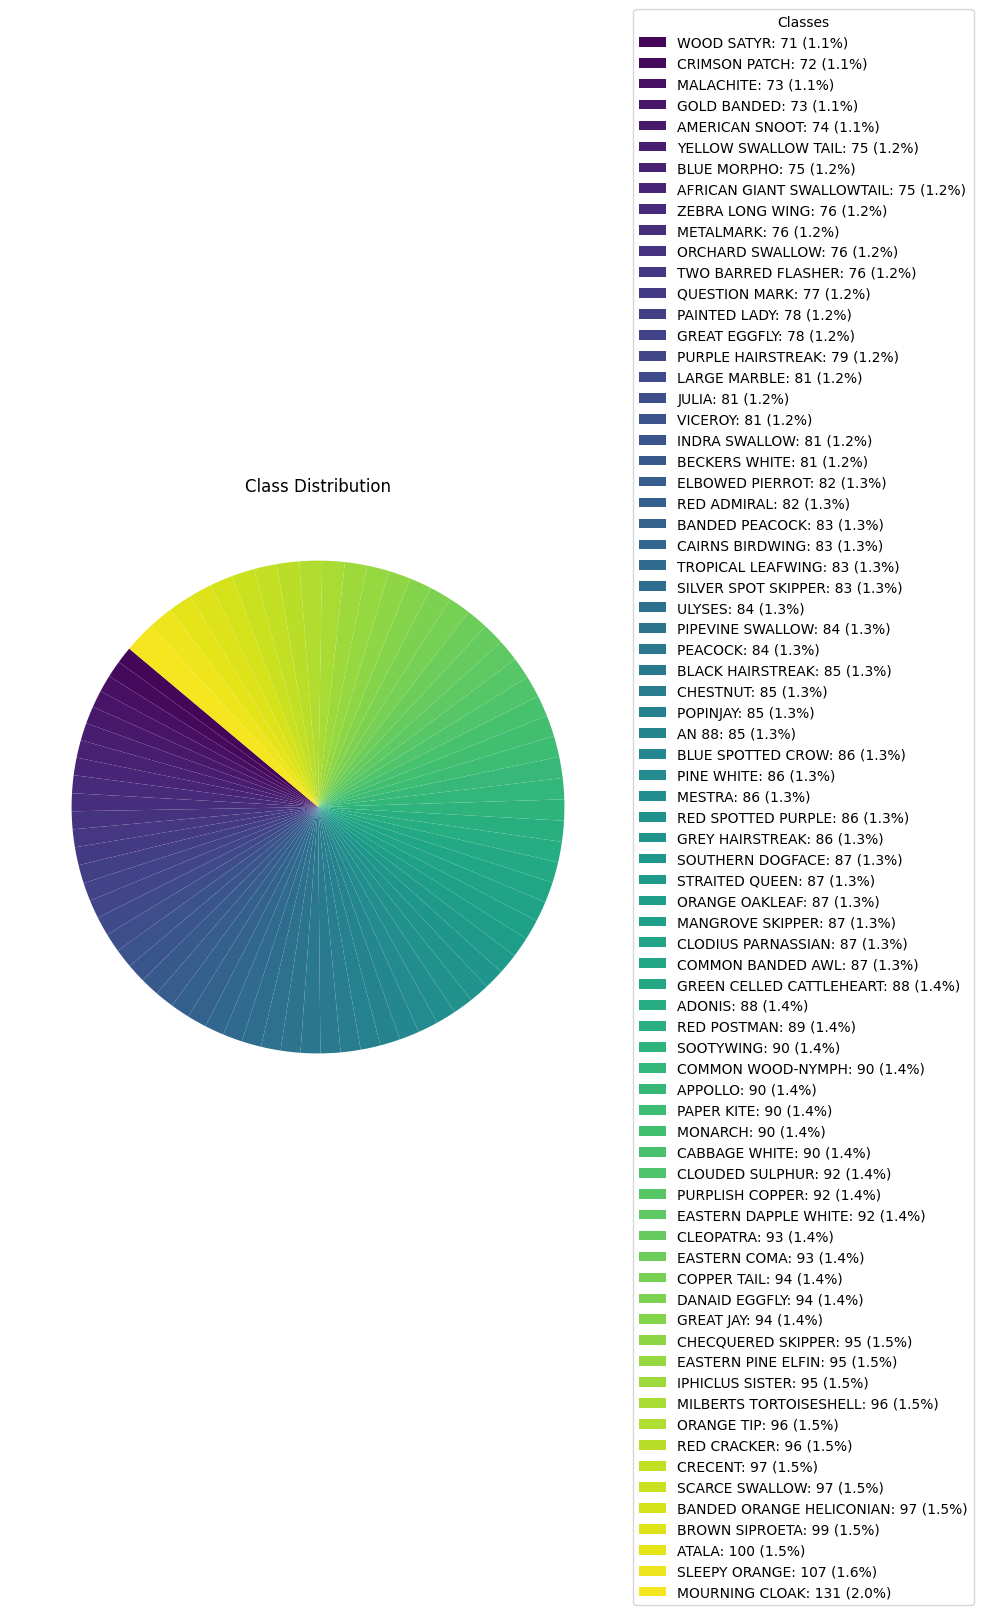

In [ ]:
# Count classes and sort them
class_counts = df['label'].value_counts().sort_values(ascending=True)

# Create a color palette using Viridis
colors = sns.color_palette("viridis", len(class_counts))

# Create the pie chart without labels
fig, ax = plt.subplots(figsize=(8, 8))
wedges, _ = ax.pie(
    class_counts,
    labels=None,  # Remove labels from the pie chart
    startangle=140,
    colors=colors
)

# Create a legend with class names and percentages
legend_labels = [f"{label}: {count} ({count / class_counts.sum() * 100:.1f}%)" for label, count in class_counts.items()]
ax.legend(wedges, legend_labels, title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))

# Set title
plt.title('Class Distribution')

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 45,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range=0.15,
    zoom_range=0.25,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
img_path = '/kaggle/input/butterfly-image-classification/train'

In [ ]:
batch_size = 16

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=img_path,
    target_size=(224,224),
    x_col='filename',
    y_col='label',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=img_path,
    target_size=(224, 224),
    x_col='filename',
    y_col='label',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.



**Methodology (ModelDesign)**


In [ ]:
import tensorflow as tf

In [ ]:
base_model = tf.keras.applications.ConvNeXtLarge(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

785596384/785596384 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
output_layer = tf.keras.layers.Dense(75, activation='softmax')(x)

In [ ]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_large_prestem_n… │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_large_stem       │ (None, 56, 56, 192)    │          9,792 │ convnext_large_preste… │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_large_stage_0_b… │ (None, 56, 56, 192)    │          9,600 │ convnext_large_stem[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_large_stage_0_b… │ (None, 56, 56, 192)    │            384 │ convnext_large_stage_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_large_stage_0_b… │ (None, 56, 56, 768)    │        148,224 │ convnext_large_stage_… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_large_stage_0_b… │ (None, 56, 56, 768)    │              0 │ convnext_large_stage_… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_large_stage_0_b… │ (None, 56, 56, 192)    │        147,648 │ convnext_large_stage_… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_large_stage_0_b… │ (None, 56, 56, 192)    │            192 │ convnext_large_stage_… │
│ (LayerScale)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_large_stage_0_b… │ (None, 56, 56, 192)    │              0 │ convnext_large_stage_… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 192)    │              0 │ convnext_large_stem[0… │
│                           │                        │                │ convnext_large_stage_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_large_stage_0_b… │ (None, 56, 56, 192)    │          9,600 │ add[0][0]              │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_large_stage_0_b… │ (None, 56, 56, 192)    │            384 │ convnext_large_stage_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_large_stage_

 Total params: 197,055,755 (751.71 MB)

 Trainable params: 825,419 (3.15 MB)

 Non-trainable params: 196,230,336 (748.56 MB)

In [ ]:
import math

In [ ]:
# Calculate Steps per Epoch
steps_per_epoch = math.ceil(train_generator.samples / batch_size)
val_steps = math.ceil(val_generator.samples / batch_size)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
# Train Model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_steps,
    callbacks=[early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


325/325 ━━━━━━━━━━━━━━━━━━━━ 200s 528ms/step - accuracy: 0.1455 - loss: 3.8597 - val_accuracy: 0.4285 - val_loss: 2.3023
Epoch 2/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


325/325 ━━━━━━━━━━━━━━━━━━━━ 168s 511ms/step - accuracy: 0.3948 - loss: 2.4105 - val_accuracy: 0.5892 - val_loss: 1.5426
Epoch 4/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 64us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 166s 508ms/step - accuracy: 0.5100 - loss: 1.8586 - val_accuracy: 0.6415 - val_loss: 1.2978
Epoch 6/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 167s 508ms/step - accuracy: 0.5868 - loss: 1.5513 - val_accuracy: 0.6962 - val_loss: 1.1394
Epoch 8/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 48us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 167s 510ms/step - accuracy: 0.6429 - loss: 1.3350 - val_accuracy: 0.7069 - val_loss: 1.0422
Epoch 10/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 56us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 167s 508ms/step - accuracy: 0.6604 - loss: 1.2345 - val_accur

**Evaluation & Results**

In [ ]:
# Evaluate Model
val_loss, val_acc = model.evaluate(val_generator, steps=val_steps)
print(f"Validation Accuracy: {val_acc:.2%}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 33s 405ms/step - accuracy: 0.8156 - loss: 0.6895
Validation Accuracy: 81.77%


In [ ]:
# Save Model
model.save("butterfly_classifier_convnext_model.h5")

In [ ]:
# Save Model Without Top Layers
base_model.save("butterfly_classifier_convnext_notop.h5", include_optimizer=False)

In [ ]:
print(len(history.history['accuracy']), len(history.history['val_accuracy']))

37 19


In [ ]:
print(history.history['accuracy'])

[0.21369494497776031, 0.0, 0.4275822341442108, 0.0, 0.5343335270881653, 0.0, 0.5974225997924805, 0.0, 0.6316599249839783, 0.0, 0.6676284074783325, 0.0, 0.6818618774414062, 0.0, 0.7020580768585205, 0.0, 0.716291606426239, 0.0, 0.7274475693702698, 0.0, 0.7282169461250305, 0.0, 0.7364878058433533, 0.0, 0.7405270338058472, 0.0, 0.7530294060707092, 0.0, 0.7530294060707092, 0.0, 0.7611079216003418, 0.0, 0.7689940333366394, 0.0, 0.7663012146949768, 0.0, 0.7722638845443726]


In [ ]:
print(history.history['loss'])

[3.3708348274230957, 0.0, 2.2367758750915527, 0.0, 1.7758389711380005, 0.0, 1.5096179246902466, 0.0, 1.349118947982788, 0.0, 1.2220542430877686, 0.0, 1.1322824954986572, 0.0, 1.0779175758361816, 0.0, 1.0170717239379883, 0.0, 0.9642885327339172, 0.0, 0.94669508934021, 0.0, 0.9227176308631897, 0.0, 0.881597638130188, 0.0, 0.8684788942337036, 0.0, 0.8473239541053772, 0.0, 0.823549747467041, 0.0, 0.7811862826347351, 0.0, 0.7851108908653259, 0.0, 0.7590212225914001]


<Figure size 1200x600 with 0 Axes>

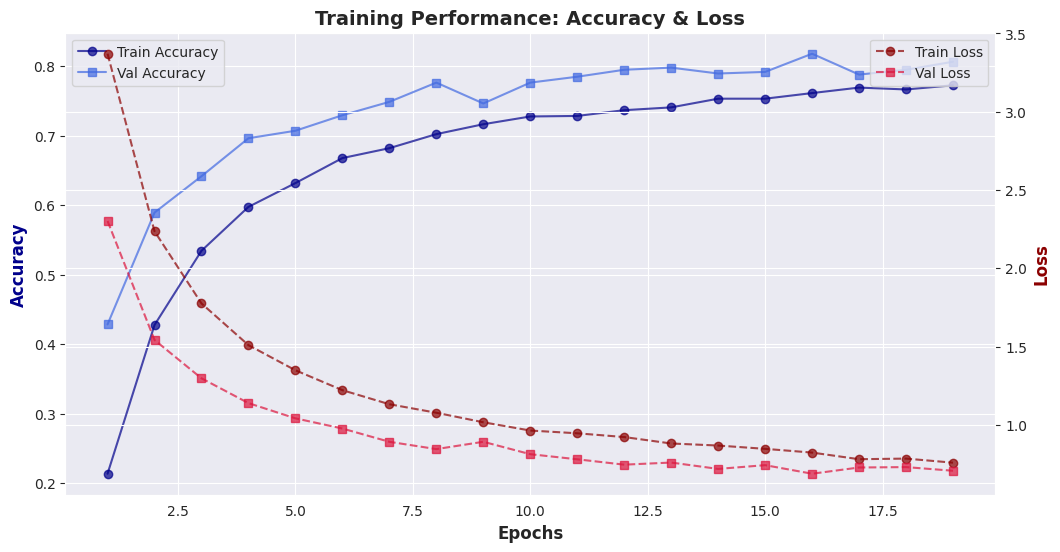

In [ ]:
# 📊 Plot Training Performance
epochs = range(1, len(history.history['val_accuracy']) + 1)
train_acc = [x for x in history.history['accuracy'] if x > 0]
val_acc = history.history['val_accuracy']
train_loss = [x for x in history.history['loss'] if x > 0]
val_loss = history.history['val_loss']

# Set up figure
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

# Plot Accuracy & Loss on Twin Axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()  # Create second axis

ax1.plot(epochs, train_acc, 'o-', label='Train Accuracy', color='darkblue', alpha=0.7)
ax1.plot(epochs, val_acc, 's-', label='Val Accuracy', color='royalblue', alpha=0.7)

ax2.plot(epochs, train_loss, 'o--', label='Train Loss', color='darkred', alpha=0.7)
ax2.plot(epochs, val_loss, 's--', label='Val Loss', color='crimson', alpha=0.7)

# Titles and labels
ax1.set_xlabel('Epochs', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy', color='darkblue', fontsize=12, fontweight='bold')
ax2.set_ylabel('Loss', color='darkred', fontsize=12, fontweight='bold')
plt.title('Training Performance: Accuracy & Loss', fontsize=14, fontweight='bold')

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show Plot
plt.show()

In [ ]:
val_images, val_labels = next(val_generator)

In [ ]:
pred_labels = model.predict(val_images)
pred_labels = np.argmax(pred_labels, axis=1)
true_labels = np.argmax(val_labels, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [ ]:
class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

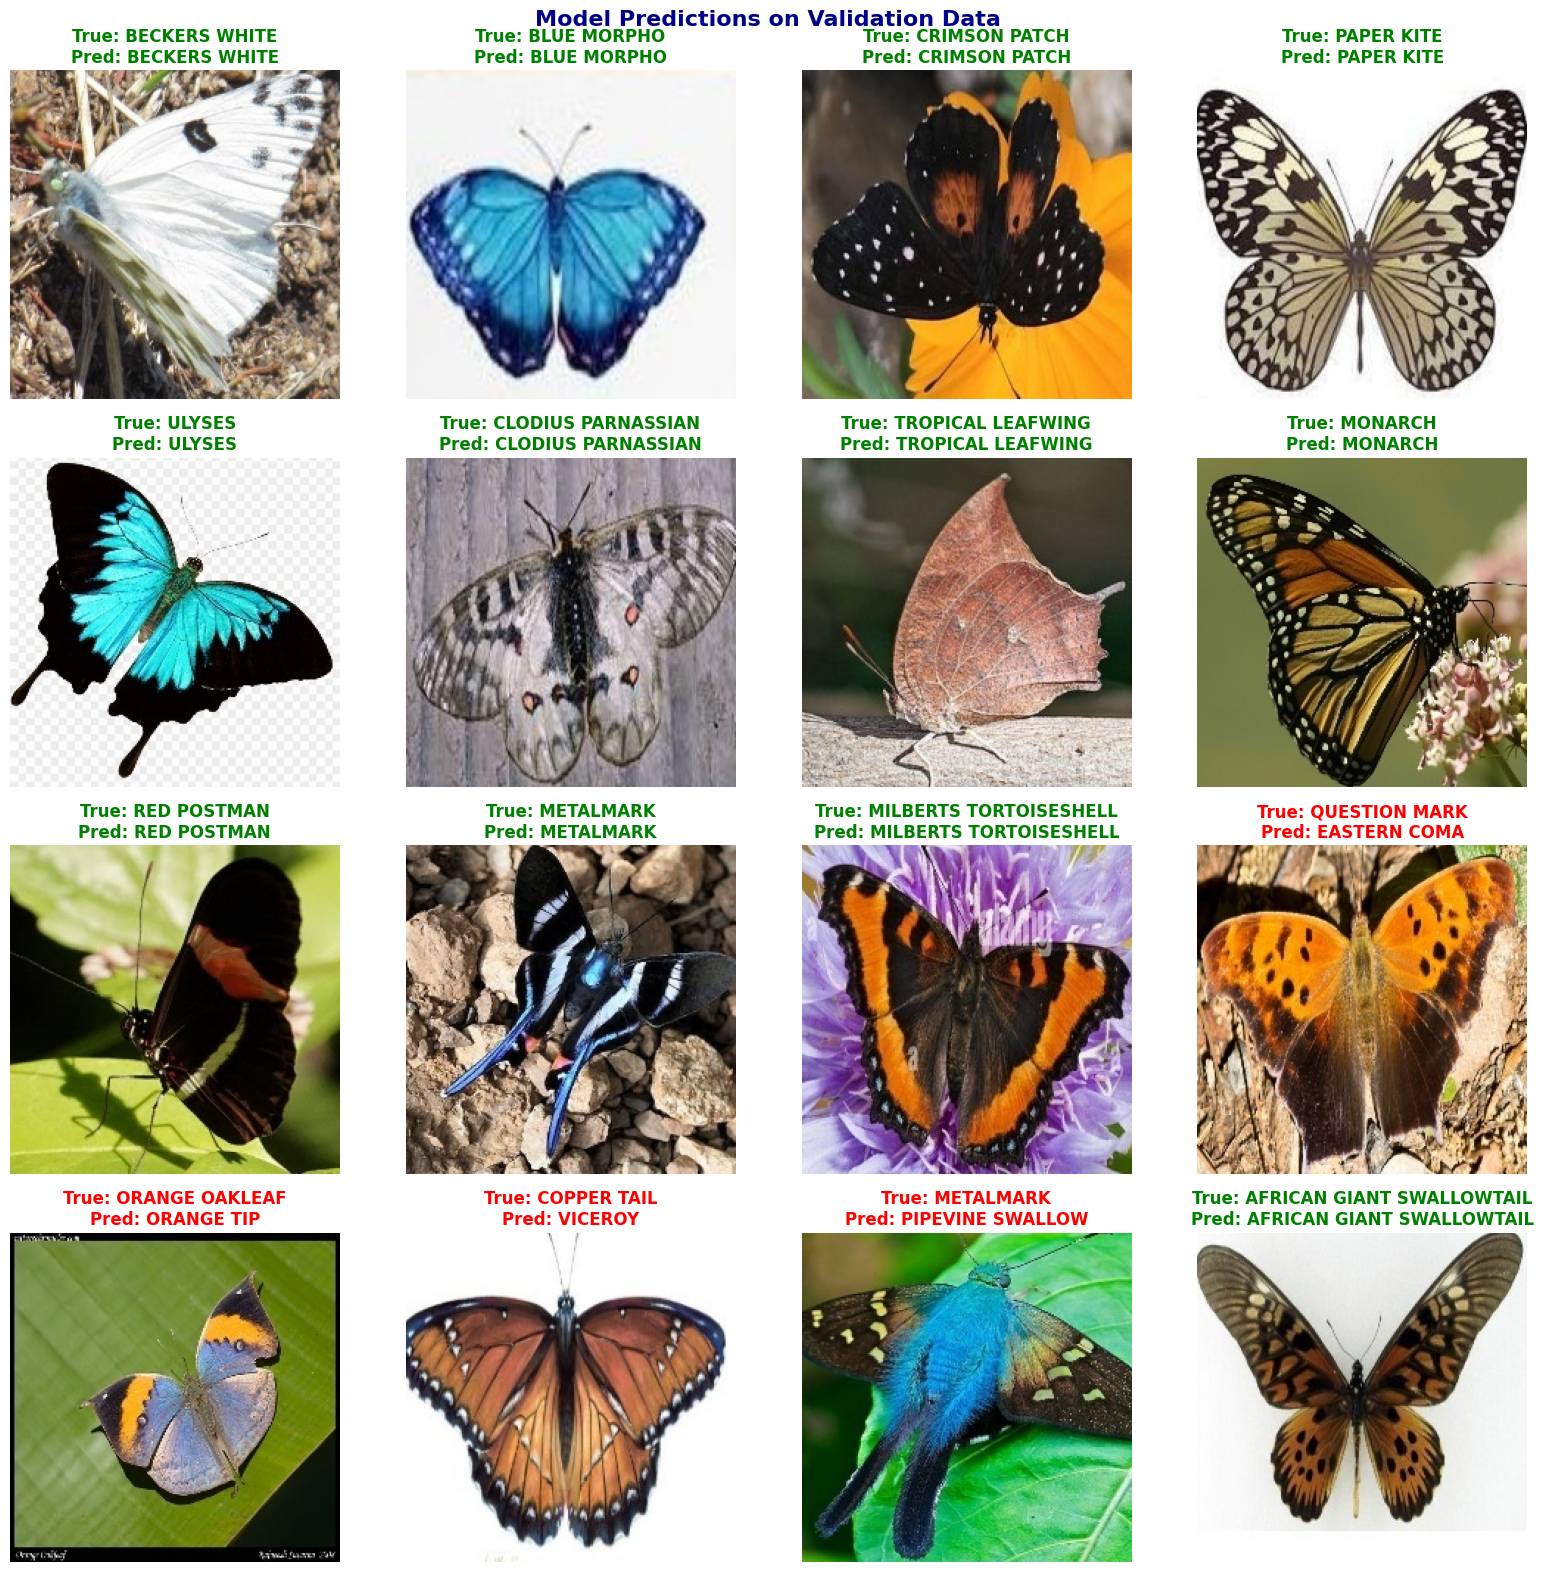

In [ ]:
def display_predictions(images, true_labels, pred_labels, class_names, num_images=16):
    num_images = min(num_images, len(images))  # Ensure we don't exceed available images

    cols = 4  # Number of columns
    rows = (num_images // cols) + (num_images % cols > 0)  # Calculate rows dynamically

    plt.figure(figsize=(cols * 4, rows * 4))  # Adjust figure size

    for i in range(num_images):
        ax = plt.subplot(rows, cols, i + 1)  # Adjust subplot grid
        ax.imshow(images[i])

        true_label = class_names[int(true_labels[i])]
        pred_label = class_names[int(pred_labels[i])]

        # Color-coded titles
        color = "green" if true_label == pred_label else "red"
        ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color, fontsize=12, fontweight='bold')

        ax.axis("off")

    plt.suptitle("Model Predictions on Validation Data", fontsize=16, fontweight='bold', color='darkblue')
    plt.tight_layout()
    plt.show()

# Call the function (fix num_images to 16 or dynamically adjust)
display_predictions(val_images, true_labels, pred_labels, class_names, num_images=16)


In [ ]:
# Calculate accuracy
accuracy = np.mean(true_labels == pred_labels) * 100

# Print accuracy
print(f"🔹 Model Accuracy on Displayed Samples: {accuracy:.2f}%")

🔹 Model Accuracy on Displayed Samples: 75.00%


Some of the codes here are taken and modified from Viera's notebook, you can check her out using this link: https://www.kaggle.com/code/edumisvieramartin/butterfly-multiclass-image-classification-cnn